Sequetial Conv1D

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D

In [0]:
seq_length = 100

model = Sequential()
model.add(Conv1D(64, 3, activation='relu', input_shape=(seq_length, 100)))
model.add(Conv1D(64, 3, activation='relu' ))
model.add(MaxPooling1D(3))
model.add(Conv1D(128, 3, activation='relu' ))
model.add(Conv1D(128, 3, activation='relu' ))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 98, 64)            19264     
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 96, 64)            12352     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 32, 64)            0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 30, 128)           24704     
_________________________________________________________________
conv1d_12 (Conv1D)           (None, 28, 128)           49280     
_________________________________________________________________
global_average_pooling1d_3 ( (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [0]:
import numpy as np
import keras

# random seed
seed = 10
np.random.seed(seed)

# 創1維向量, shape suitable for keras input of conv1D
# conv1d input.shape (batch_size, steps, input_dim)
data_1d = np.random.normal(size=25)
data_1d = np.expand_dims(data_1d, 0)
data_1d = np.expand_dims(data_1d, 2) # size=25=steps

# convolutional layer definition
# data_1d = (1,25,1) data_1d size = batch_size*steps*input_dim = 1*25*1 = 25

filters = 1 # 卷積核數量=1
kernel_size = 5 # 卷積核大小=5

convolution_1d_layer = keras.layers.convolutional.Conv1D(filters, kernel_size, strides=1,
                                                         padding='valid', input_shape=(25,1), activation='relu', name= "convlution_1d_layer" )
# maxpooling layer
max_pooling_layer = keras.layers.MaxPooling1D(pool_size=5, strides=1, padding='valid', name="max_pooling_layer") 

# flatten 平坦層, 調整維度, 接後面的全聯結層
reshape_layer = keras.layers.core.Flatten(name="reshape_layer")

# full_connect_layer 按照常態分佈生成隨機tensor的初始化器
full_connect_layer = keras.layers.Dense(5, kernel_initializer=keras.initializers.RandomNormal(mean=0.0, stddev=0.1, seed=seed),
                                        bias_initializer="random_normal", use_bias=True, name="full_connect_layer")

# 編譯模型
model = keras.Sequential()
model.add(convolution_1d_layer)
model.add(max_pooling_layer)
model.add(reshape_layer)
model.add(full_connect_layer)

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
convlution_1d_layer (Conv1D) (None, 21, 1)             6         
_________________________________________________________________
max_pooling_layer (MaxPoolin (None, 17, 1)             0         
_________________________________________________________________
reshape_layer (Flatten)      (None, 17)                0         
_________________________________________________________________
full_connect_layer (Dense)   (None, 5)                 90        
Total params: 96
Trainable params: 96
Non-trainable params: 0
_________________________________________________________________


In [0]:
output =  keras.Model(inputs=model.input, 
                      outputs=model.get_layer('full_connect_layer').output).                      predict(data_1d)

In [0]:
print(output,'\n')

[[ 0.02632669 -0.4254459   0.15431698 -0.17618844 -0.13731775]] 



In [0]:
data_1d.shape

(1, 25, 1)

In [0]:
# np.expand_dims example
a = np.array([4,6])
print(a.shape)
a = np.expand_dims(a, axis=0)
print(a.shape)

(2,)
(1, 2)


In [0]:
a = np.array([[4,6],[5,7],[8,9]])
print(a.shape)
a = np.expand_dims(a, axis=0)
print(a.shape)

(3, 2)
(1, 3, 2)


In [0]:
# random normal example
numpy.random.normal(loc=0.0, scale=1.0, size=None)

In [0]:
data_1d

array([[[ 1.3315865 ],
        [ 0.71527897],
        [-1.54540029],
        [-0.00838385],
        [ 0.62133597],
        [-0.72008556],
        [ 0.26551159],
        [ 0.10854853],
        [ 0.00429143],
        [-0.17460021],
        [ 0.43302619],
        [ 1.20303737],
        [-0.96506567],
        [ 1.02827408],
        [ 0.22863013],
        [ 0.44513761],
        [-1.13660221],
        [ 0.13513688],
        [ 1.484537  ],
        [-1.07980489],
        [-1.97772828],
        [-1.7433723 ],
        [ 0.26607016],
        [ 2.38496733],
        [ 1.12369125]]])

In [0]:
np.random.seed(1)
np.random.randn(2,2)

array([[ 1.62434536, -0.61175641],
       [-0.52817175, -1.07296862]])

In [0]:
np.random.randn(2,2)

array([[ 0.86540763, -2.3015387 ],
       [ 1.74481176, -0.7612069 ]])

In [0]:
np.random.seed(10)
np.random.randn(2,2)

array([[ 1.3315865 ,  0.71527897],
       [-1.54540029, -0.00838385]])

# LSTM 做序列分類

In [0]:
import keras
from keras.layers import LSTM, Dense
import numpy as np

data_dim = 1
timesteps = 8
num_classes = 10 

# model
model = Sequential()
model.add(LSTM(32, return_sequences=True, input_shape=(timesteps,data_dim)))
model.add(LSTM(32, return_sequences=True)) # return a single vector of dmension 32
model.add(Dense(num_classes, activation='softmax'))  

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 8, 32)             4352      
_________________________________________________________________
lstm_3 (LSTM)                (None, 8, 32)             8320      
_________________________________________________________________
dense_4 (Dense)              (None, 8, 10)             330       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Keras LSTM 
# 輸出的hidden state 包含所有的time steps的結果
LSTM(1, return_sequences=True)

In [0]:
lstm1, state_h, state_c = LSTM(1, return_state=True)
# 輸出所有time steps的hidden state, 又會去輸出cell state
lstm1, state_h, state_c = LSTM(1, return_sequences=True, return_state=True)

# Stateful LSTM

In [0]:
# Stateful LSTM: 模型會去學習輸入sample之間的時序特徵, 適合長序列的預測, 會知道sample前後順序的差異
# sample前後順序差異, 會對此模型產生影響
# Stateless LSTM: 每個sample獨立, 前後沒關係, sample進來後會被shuffle, 適合沒有前後關係的樣本

# Stateless LSTM 調用下面function將LSTM網路中的記憶狀態初始化, 因為shuffle後記憶參數傳遞無意義
model.reset_states() # 重製模型所有層的狀態
layer.reset_states() # 重製指定rnn層的狀態

# Stateful LSTM 
# stateful = True, shuffle=False
# X[i]將記憶參數傳遞給X[i+bs] (第i+bs個sample) bs = batch_size
# X[i+n*bs] 也知道X[i]的訊息

In [0]:
# Stateful LSTM
data_dim = 16
timesteps = 8
num_classes = 10
batch_size = 2

# input shape:(batch_size, time_steps, data_dim)
model=Sequential()
model.add(LSTM(32, return_sequences=True, stateful=True,
               batch_input_shape=(batch_size, timesteps, data_dim)))
model.add(LSTM(32, return_sequences=True, stateful=True))
model.add(LSTM(32, stateful=True))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (2, 8, 32)                6272      
_________________________________________________________________
lstm_9 (LSTM)                (2, 8, 32)                8320      
_________________________________________________________________
lstm_10 (LSTM)               (2, 32)                   8320      
_________________________________________________________________
dense_5 (Dense)              (2, 10)                   330       
Total params: 23,242
Trainable params: 23,242
Non-trainable params: 0
_________________________________________________________________


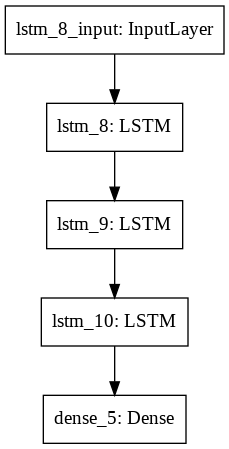

In [0]:
# PIL (Pillow)
from keras.utils import plot_model
from PIL import Image

plot_model(model, to_file = ("Stateful_LSTM.png"))

# LSTM FUNCTIONAL MODEL EXAMPLE